#IST 718
##LAB 3 ASSIGNMENT
###Matthew L. Pergolski | Professor Jillian Lando

## Overview
In the IST 718 Lab 3 assignment, the O-S-E-M-IN method will be conducted to perform image classification on digits and fashion items as part of the mnsit dataset found here:

https://github.com/zalandoresearch/fashion-mnist/tree/master/data

•	O | 
Obtain: In the obtaining section, Data Acquisition will be discussed and referenced.

•	S | 
Scrub: In the scrubbing section, Data Cleaning will be discussed and referenced.

•	E | 
Explore: In the exploring section, Data Exploration will be discussed and referenced.

•	M | 
Model: In the modeling section, Data Modeling techniques will be discussed – the workings of our linear model will be introduced and referenced.

•	IN | 
Interpret: In the interpreting section, we will summarize the results and provide the overall recommendation to the stakeholder.



For this lab, the O, S, and E items will be combined, since the dataset was provided by the IST 718 class.  It contains images of digits as well as fashion items.  For each respective datset, we performed a `wget` command that collects data from a specific address on the internet.  The `gz` files are then uncompressed to access the full image dataset.  This was completed for both the MNIST and Fashion-MNIST datasets

For Modeling techniques, Naive Bayes and the Keras models were chosen for both datasets.  Findings will be discussed in the `Questions` section of this report.

# MNIST

### Data Imports and Cleaning/Exploration

In [ ]:
import gzip
import os
import sys
import struct
import numpy as np



In [ ]:
# Cleaning -- downloading from web and transforming into numpy array(s)

In [ ]:
def read_image(fi):
    magic, n, rows, columns = struct.unpack(">IIII", fi.read(16))
    assert magic == 0x00000803
    assert rows == 28
    assert columns == 28
    rawbuffer = fi.read()
    assert len(rawbuffer) == n * rows * columns
    rawdata = np.frombuffer(rawbuffer, dtype='>u1', count=n*rows*columns)
    return rawdata.reshape(n, rows, columns).astype(np.float32) / 255.0

def read_label(fi):
    magic, n = struct.unpack(">II", fi.read(8))
    assert magic == 0x00000801
    rawbuffer = fi.read()
    assert len(rawbuffer) == n
    return np.frombuffer(rawbuffer, dtype='>u1', count=n)



In [ ]:
if __name__ == '__main__':
    os.system('wget -N http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz')
    os.system('wget -N http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz')
    os.system('wget -N http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz')
    os.system('wget -N http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz')
    
    np.savez_compressed(
        'mnist',
        train_x=read_image(gzip.open('train-images-idx3-ubyte.gz', 'rb')),
        train_y=read_label(gzip.open('train-labels-idx1-ubyte.gz', 'rb')),
        test_x=read_image(gzip.open('t10k-images-idx3-ubyte.gz', 'rb')),
        test_y=read_label(gzip.open('t10k-labels-idx1-ubyte.gz', 'rb'))
    )

In [ ]:
# Initial Data Analysis

In [ ]:
import numpy as np
data = np.load('mnist.npz')

print(data['train_x'].shape, data['train_x'].dtype)
print(data['train_y'].shape, data['train_y'].dtype)
print(data['test_x'].shape, data['test_x'].dtype)
print(data['test_y'].shape, data['test_y'].dtype)

(60000, 28, 28) float32
(60000,) uint8
(10000, 28, 28) float32
(10000,) uint8


9


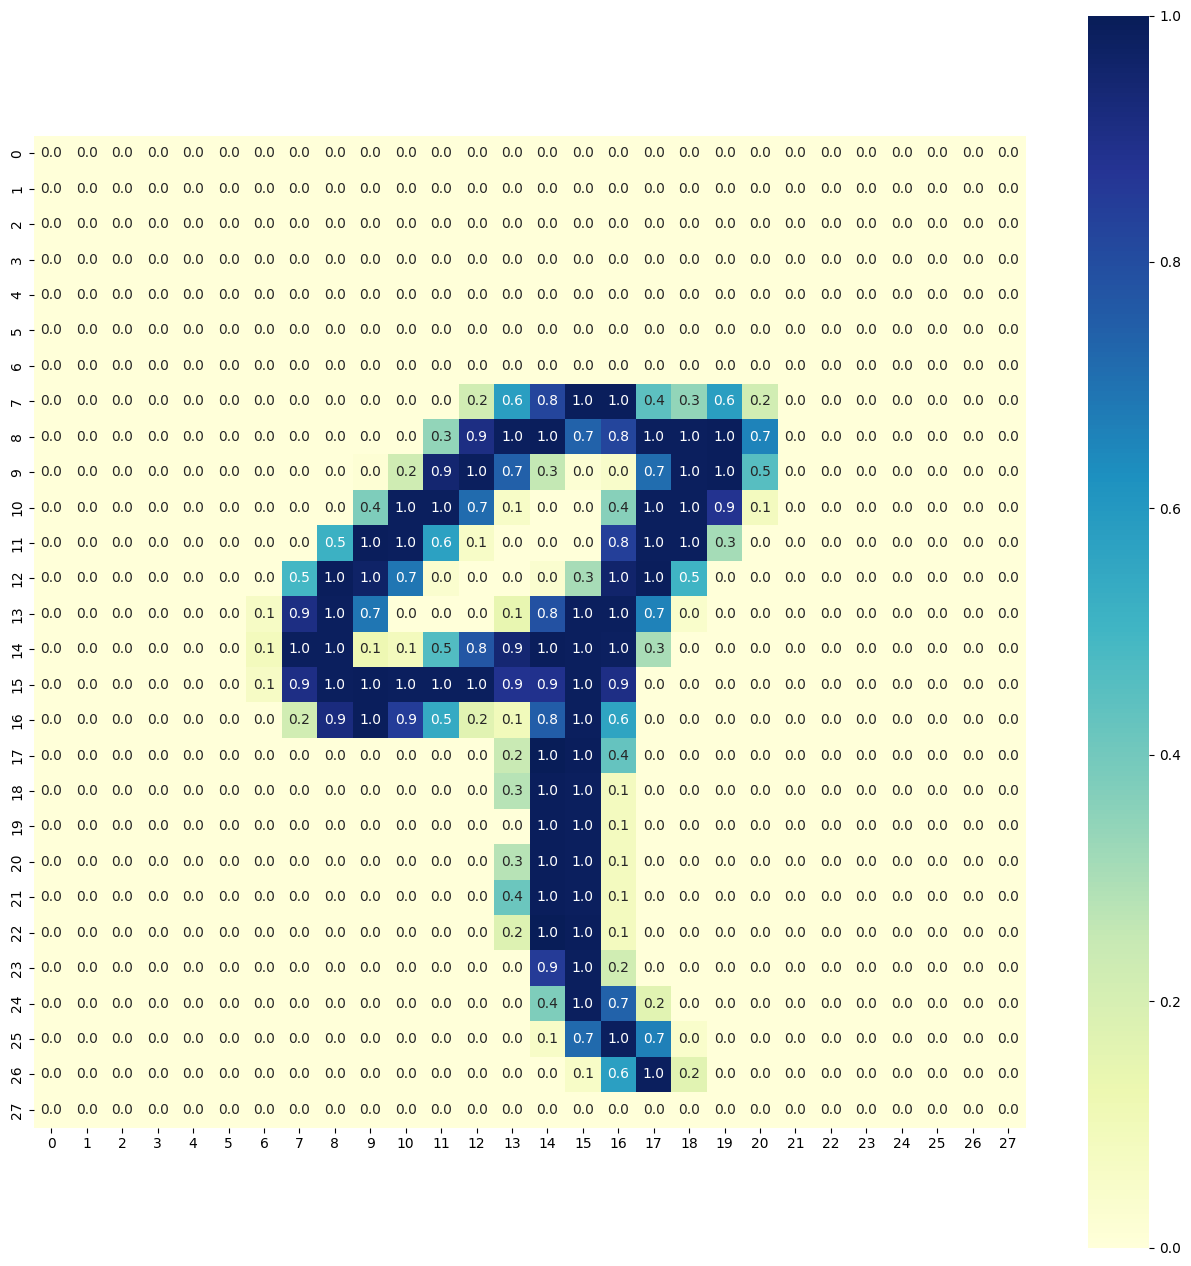

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

i = 4

data = np.load('mnist.npz')
image = data['train_x'][i]
label = data['train_y'][i]

print(label)
f, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(image, annot=True, fmt='.1f', square=True, cmap="YlGnBu")
plt.show()

In [ ]:
# Naive Bayes

In [ ]:
import numpy as np
from sklearn.naive_bayes import GaussianNB

data = np.load('mnist.npz')
train_x = data['train_x']
train_y = data['train_y']
test_x = data['test_x']
test_y = data['test_y']

train_x = train_x.reshape(train_x.shape[0], -1)
test_x = test_x.reshape(test_x.shape[0], -1)

clf = GaussianNB()
clf.fit(train_x, train_y)

y_pred = clf.predict(test_x)

accuracy = np.mean(y_pred == test_y)
print('Accuracy:', accuracy)

from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, y_pred)

Accuracy: 0.5558


array([[ 870,    0,    3,    5,    2,    5,   31,    1,   35,   28],
       [   0, 1079,    2,    1,    0,    0,   10,    0,   38,    5],
       [  79,   25,  266,   91,    5,    2,  269,    4,  271,   20],
       [  32,   39,    6,  353,    2,    3,   51,    8,  409,  107],
       [  19,    2,    5,    4,  168,    7,   63,    7,  210,  497],
       [  71,   25,    1,   20,    3,   44,   40,    2,  586,  100],
       [  12,   12,    3,    1,    1,    7,  895,    0,   26,    1],
       [   0,   15,    2,   10,    5,    1,    5,  280,   39,  671],
       [  13,   72,    3,    7,    3,   11,   12,    4,  648,  201],
       [   5,    7,    3,    6,    1,    0,    1,   13,   18,  955]])

In [ ]:
# Try to improve Naive Bayes model with normalization

# Model may be holding us back

In [ ]:
import numpy as np
from sklearn.naive_bayes import GaussianNB

data = np.load('mnist.npz')
train_x = data['train_x']
train_y = data['train_y']
test_x = data['test_x']
test_y = data['test_y']

train_x = train_x.reshape(train_x.shape[0], -1)
test_x = test_x.reshape(test_x.shape[0], -1)

train_x = train_x / 255.0
test_x = test_x / 255.0

clf = GaussianNB()
clf.fit(train_x, train_y)

y_pred = clf.predict(test_x)

accuracy = np.mean(y_pred == test_y)
print('Accuracy:', accuracy)

Accuracy: 0.5558


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

data = np.load('mnist.npz')
train_x = data['train_x']
train_y = data['train_y']
test_x = data['test_x']
test_y = data['test_y']

train_x = train_x.reshape(train_x.shape[0], -1)
test_x = test_x.reshape(test_x.shape[0], -1)

train_x = train_x / 255.0
test_x = test_x / 255.0

num_classes = len(np.unique(train_y))
train_y = np.eye(num_classes)[train_y]
test_y = np.eye(num_classes)[test_y]

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_x, train_y, batch_size=128, epochs=10)

loss, accuracy = model.evaluate(test_x, test_y)
print('Loss:', loss)
print('Accuracy:', accuracy)

Epoch 1/10
469/469 [==============================] - 7s 3ms/step - loss: 0.8484 - accuracy: 0.7463
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3547 - accuracy: 0.8971
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2979 - accuracy: 0.9132
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2609 - accuracy: 0.9240
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2275 - accuracy: 0.9345
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1992 - accuracy: 0.9416
Epoch 7/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1763 - accuracy: 0.9483
Epoch 8/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1555 - accuracy: 0.9544
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1380 - accuracy: 0.9595
Epoch 10/10
313/313 [==============================] - 2s 4ms/step - loss: 0.1223 - accuracy: 0.9632

In [ ]:
# Increase epochs from 10 to 20

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

data = np.load('mnist.npz')
train_x = data['train_x']
train_y = data['train_y']
test_x = data['test_x']
test_y = data['test_y']

train_x = train_x.reshape(train_x.shape[0], -1)
test_x = test_x.reshape(test_x.shape[0], -1)

train_x = train_x / 255.0
test_x = test_x / 255.0

num_classes = len(np.unique(train_y))
train_y = np.eye(num_classes)[train_y]
test_y = np.eye(num_classes)[test_y]

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_x, train_y, batch_size=128, epochs=30)

loss, accuracy = model.evaluate(test_x, test_y)
print('Loss:', loss)
print('Accuracy:', accuracy)

Epoch 1/30
469/469 [==============================] - 3s 3ms/step - loss: 0.8926 - accuracy: 0.7316
Epoch 2/30
469/469 [==============================] - 2s 3ms/step - loss: 0.3732 - accuracy: 0.8908
Epoch 3/30
469/469 [==============================] - 2s 3ms/step - loss: 0.3052 - accuracy: 0.9111
Epoch 4/30
469/469 [==============================] - 2s 3ms/step - loss: 0.2649 - accuracy: 0.9227
Epoch 5/30
469/469 [==============================] - 2s 5ms/step - loss: 0.2329 - accuracy: 0.9316
Epoch 6/30
469/469 [==============================] - 2s 4ms/step - loss: 0.2049 - accuracy: 0.9393
Epoch 7/30
469/469 [==============================] - 2s 3ms/step - loss: 0.1806 - accuracy: 0.9466
Epoch 8/30
469/469 [==============================] - 2s 3ms/step - loss: 0.1596 - accuracy: 0.9533
Epoch 9/30
469/469 [==============================] - 2s 3ms/step - loss: 0.1410 - accuracy: 0.9583
Epoch 10/30
469/469 [==============================] - 2s 3ms/step - loss: 0.1263 - accuracy: 0.9630

In [ ]:
# 30 epochs seems (a tad too many -- started getting diminishing returns), we'll revert to 29 epochs.

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

data = np.load('mnist.npz')
train_x = data['train_x']
train_y = data['train_y']
test_x = data['test_x']
test_y = data['test_y']

train_x = train_x.reshape(train_x.shape[0], -1)
test_x = test_x.reshape(test_x.shape[0], -1)

train_x = train_x / 255.0
test_x = test_x / 255.0

num_classes = len(np.unique(train_y))
train_y = np.eye(num_classes)[train_y]
test_y = np.eye(num_classes)[test_y]

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_x, train_y, batch_size=128, epochs=29)

print(model.evaluate(test_x, test_y))

loss, accuracy = model.evaluate(test_x, test_y)
print('Loss:', loss)
print('Accuracy:', accuracy)

Epoch 1/29
469/469 [==============================] - 3s 3ms/step - loss: 0.8555 - accuracy: 0.7482
Epoch 2/29
469/469 [==============================] - 2s 3ms/step - loss: 0.3626 - accuracy: 0.8949
Epoch 3/29
469/469 [==============================] - 1s 3ms/step - loss: 0.3013 - accuracy: 0.9113
Epoch 4/29
469/469 [==============================] - 1s 3ms/step - loss: 0.2630 - accuracy: 0.9225
Epoch 5/29
469/469 [==============================] - 2s 4ms/step - loss: 0.2324 - accuracy: 0.9314
Epoch 6/29
469/469 [==============================] - 2s 4ms/step - loss: 0.2046 - accuracy: 0.9406
Epoch 7/29
469/469 [==============================] - 2s 3ms/step - loss: 0.1811 - accuracy: 0.9466
Epoch 8/29
469/469 [==============================] - 2s 3ms/step - loss: 0.1601 - accuracy: 0.9524
Epoch 9/29
469/469 [==============================] - 2s 3ms/step - loss: 0.1434 - accuracy: 0.9584
Epoch 10/29
469/469 [==============================] - 1s 3ms/step - loss: 0.1282 - accuracy: 0.9625

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dense_14 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


# Fashion-MNIST

In [1]:
!wget https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/t10k-images-idx3-ubyte.gz

--2023-06-07 19:44:10--  https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/t10k-images-idx3-ubyte.gz
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/t10k-images-idx3-ubyte.gz [following]
--2023-06-07 19:44:10--  https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/t10k-images-idx3-ubyte.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4422102 (4.2M) [application/octet-stream]
Saving to: ‘t10k-images-idx3-ubyte.gz’

t10k-images-idx3-ub 100%[===================>]   4.22M  --.-KB/s    in 0.03s 

In [2]:
!gunzip t10k-images-idx3-ubyte.gz

In [3]:
import struct
import numpy as np

def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

In [4]:
images = read_idx('t10k-images-idx3-ubyte')

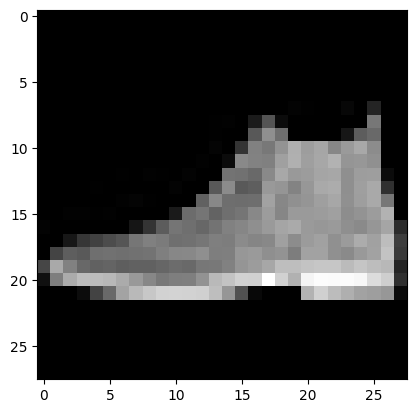

In [5]:
import matplotlib.pyplot as plt

plt.imshow(images[0], cmap='gray')
plt.show()

In [6]:
# Naive Bayes

In [7]:
!wget https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/t10k-labels-idx1-ubyte.gz
!gunzip t10k-labels-idx1-ubyte.gz
labels = read_idx('t10k-labels-idx1-ubyte')

--2023-06-07 19:44:11--  https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/t10k-labels-idx1-ubyte.gz
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/t10k-labels-idx1-ubyte.gz [following]
--2023-06-07 19:44:11--  https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/t10k-labels-idx1-ubyte.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5148 (5.0K) [application/octet-stream]
Saving to: ‘t10k-labels-idx1-ubyte.gz’

t10k-labels-idx1-ub 100%[===================>]   5.03K  --.-KB/s    in 0s      


In [8]:
num_images = images.shape[0]
reshaped_images = images.reshape((num_images, -1))

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    reshaped_images, labels, test_size=0.2, random_state=42
)

In [21]:
%%time

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

CPU times: user 56.4 ms, sys: 10.1 ms, total: 66.6 ms
Wall time: 67.5 ms


GaussianNB()

In [11]:
from sklearn.metrics import accuracy_score

y_pred = gnb.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.566


In [12]:
# Keras

In [13]:
images = images / 255.0

In [14]:
num_images = images.shape[0]
reshaped_images = images.reshape((num_images, -1))

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    reshaped_images, labels, test_size=0.2, random_state=42
)

In [16]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax')
])


In [17]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [20]:
%%time
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
250/250 [==============================] - 1s 5ms/step - loss: 0.3088 - accuracy: 0.8889
Epoch 2/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3000 - accuracy: 0.8911
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.2829 - accuracy: 0.8985
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.2747 - accuracy: 0.9015
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.2575 - accuracy: 0.9056
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.2483 - accuracy: 0.9091
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.2390 - accuracy: 0.9161
Epoch 8/10
250/250 [==============================] - 1s 2ms/step - loss: 0.2258 - accuracy: 0.9141
Epoch 9/10
250/250 [==============================] - 1s 2ms/step - loss: 0.2143 - accuracy: 0.9234
Epoch 10/10
250/250 [==============================] - 1s 2ms/step - loss: 0.2097 - accuracy: 0.9252

In [19]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy: ", accuracy)

63/63 [==============================] - 0s 2ms/step - loss: 0.4665 - accuracy: 0.8335
Accuracy:  0.8335000276565552


## LAB 3 QUESTIONS

## What was the accuracy of each method?

For the MNIST dataset, here are the accuracy values:
- Naive Bayes
  - ~57%
- Keras
  -  ~98%

For the Fashion-MNIST dataset, here are the accuracy values:
- Naive Bayes
  - ~57%
- Keras
  -  ~84%

In both cases, the Keras model singificantly outperformed the Naive Bayes test.  More testing could be done to see if the Keras model has overfit on the dataset, however.  With more time, this would be the scope for the next phase of this exploration.

## What are the trade-offs of each approach?

There are few pros and cons that ca nbe discussed between these appraoches:

Interpotability
- Naive Bayes is generally a simpler model for interpotability and comprehension by the user -- whereas the Keras model uses neural networks that many consider to be somewhat like 'black boxes' (i.e., they have many deep layers that perform complicated mathemtical calculations).  Put simply, a Naive Bayes model is easier to diagram vs an intricate deep learning model.

Accuracy
- Although both seem to be distant in accuracy, they may not be too far off if more research is done.  Deep learning models can be prone to overfitting on the training data.  This can give an illusion that the model truly understands the innerworkings of the data, but may perform poorly on new data. Naive Bayes is less likley to overfit on data vs a model like from Keras.

## What is the compute performance of each approach?

In the Fashion-MNIST example, the Naive Bayes model took just 67.5 milliseconds to run, while the Keras model took 7.64 seconds to render.  This can be discovered when using the `%%time` command in a jupyternotebook cell.

This alludes to the idea that the Keras/Deep-Learning model takes singificantly longer to execute.  It is on the order of magnititude of 100+ times slower.